In [ ]:
#ref:https://github.com/Elwing-Chou、https://brohrer.mcknote.com/zh-Hant/how_machine_learning_works/how_convolutional_neural_networks_work.html
#ref:https://www.google.com/search?ei=0N0WXZnEHIqs8QX_nbu4BQ&q=imagenet+vgg16&oq=IMAGENET+V&gs_l=psy-ab.1.0.0l3j0i203l7.968.4438..8063...1.0..0.52.145.3......0....1..gws-wiz.......0i67.AdjSEiX2Dyc
#ref:https://ithelp.ithome.com.tw/articles/10192162
'''
圖像深度學習
MLP便是簡單手寫影像OK，但用來分析複雜影像發現問題
1.把每個像素全部連接下去訓練參數太多，花費時間太多
2.圖片素材取得不易，難建立大量資料

CNN(Convolutional Neural Network)捲積神經網路
與之前不同的地方在於多了卷積、池化
步驟:捲積(特徵萃取)-池化(減低計算量)-計算分類(MLP)

卷積層:mnist使用的方法是把所有pixel放入計算，一個圖片上其實有很多特徵例如:顏色、輪廓等，使用filter來抓取我們所需的特徵例如:顏色、輪廓等
再將這一些特徵拿來做分類，用一個filter一步一步移動檢查區域內有無想要的feature，得到我們要的feature map

池化層:為了解決計算量太大的問題，將feature map以一步一步方式固定的區域大小，來取區域的平均(Max Pooling)或最大值(mean Polling)

如何選擇CNN的架構(幾層捲積和池化、池化的大小該多少、filter的數量應該是多少?)
一般來說或傾向參考別人的架構

'''

In [1]:
#讀入keras內建圖片資料
from keras.datasets import cifar10
((x_train,y_train),(x_test,y_test)) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
#圖片為32*32pixel,RGB色圖
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [3]:
label = {0:"飛機", 1:"車", 2:"鳥", 3:"貓", 4:"鹿", 5:"狗", 6:"青蛙", 7:"馬", 8:"船", 9:"卡車"}

In [4]:
import matplotlib.pyplot as plt
a = int(input("請輸入想看的圖片 [0-49999]"))
print("輸入的圖片",a)
print("圖片的答案",label[y_train[a][0]])
plt.imshow(x_train[a])

請輸入想看的圖片 [0-49999]7
輸入的圖片 7
圖片的答案 馬


In [6]:
#標準化、One-Hot-Encoding
#np_utils y轉成One-Hot-Encoding
from keras.utils import np_utils
x_train_shaped = x_train.astype("float32") / 255
x_test_shaped = x_test.astype("float32") / 255
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)

In [ ]:
#建立模型
'''
參考VGG-16的參數,VGG-16僅用了卷積、池化及全連接層構成整體架構
使用3種不同Layer
1.Conv2d(卷積層):
使用Conv2d卷積層，參考VGG-16設定filter擴充到３２通道，kernel_size為過濾器的寬和高，中間層選用relu避免梯度消失，padding
讓卷積厚寬高保持不變
2.MaxPooling2D(最大池化層)
選擇池化窗（2,2），兩個長、寬取區域最大值能減少參數，降低overfitting的可能性

3.Dropout(Dropout層)
訓練中很怕遇到過擬合，神經網路中可透過每次訓練隨機斷開一些神經元來避免，依照經驗drop25%-50%神經元會不錯

4.Flatten(壓扁)
即把多维的資料一維化，常使用在全連接層前

'''

In [7]:
#測試簡單模型
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
model = Sequential()

#第一次卷積與第一次池化
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32,32,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

#斷開25%的神經連結，並加入第二次卷積合第二次池化
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

#把處理過的東西攤開成一維
model.add(Flatten())
model.add(Dropout(rate=0.25))

#全連接層
model.add(Dense(128,activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(10, activation='softmax'))
model.summary()


W0629 20:20:03.539294 10704 deprecation_wrapper.py:119] From C:\Users\keneau\PycharmProjects\work\venv\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0629 20:20:03.612251 10704 deprecation_wrapper.py:119] From C:\Users\keneau\PycharmProjects\work\venv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0629 20:20:03.615264 10704 deprecation_wrapper.py:119] From C:\Users\keneau\PycharmProjects\work\venv\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0629 20:20:03.627243 10704 deprecation_wrapper.py:119] From C:\Users\keneau\PycharmProjects\work\venv\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0629 20:20

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4096)              0         
__________

In [ ]:
'''
para參數
1.32個濾波器，每一個3(寬)*3(高)*3(input 通道RBG)+1(bais)=28參數 32*32
2.64個濾波器，每一個3(寬)*3(高)*32(input 通道RBG)+1(bais)=289參數 289*64
3.全連接層:4906*128+128(bias)
'''


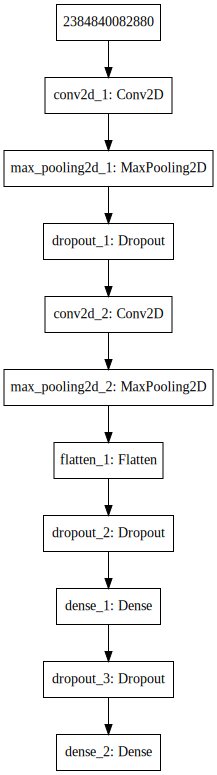

In [8]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG((model_to_dot(model)).create(prog='dot', format = 'svg'))

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history = model.fit(x = x_train_shaped, y = y_train_cat,
                         validation_split = 0.1,
                         epochs = 20,
                         batch_size = 128,
                         verbose = 2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 47s - loss: 1.5551 - acc: 0.4355 - val_loss: 1.3093 - val_acc: 0.5422
Epoch 2/20
 - 52s - loss: 1.3061 - acc: 0.5335 - val_loss: 1.1239 - val_acc: 0.6134
Epoch 3/20
 - 58s - loss: 1.1735 - acc: 0.5828 - val_loss: 1.0264 - val_acc: 0.6458
Epoch 4/20
 - 52s - loss: 1.0909 - acc: 0.6140 - val_loss: 0.9679 - val_acc: 0.6626
Epoch 5/20
 - 48s - loss: 1.0335 - acc: 0.6331 - val_loss: 0.9060 - val_acc: 0.6894
Epoch 6/20
 - 48s - loss: 0.9850 - acc: 0.6536 - val_loss: 0.8855 - val_acc: 0.6942
Epoch 7/20
 - 48s - loss: 0.9499 - acc: 0.6643 - val_loss: 0.9100 - val_acc: 0.6890
Epoch 8/20
 - 48s - loss: 0.9143 - acc: 0.6753 - val_loss: 0.8375 - val_acc: 0.7116
Epoch 9/20
 - 47s - loss: 0.8818 - acc: 0.6895 - val_loss: 0.8306 - val_acc: 0.7168
Epoch 10/20
 - 47s - loss: 0.8556 - acc: 0.6937 - val_loss: 0.8019 - val_acc: 0.7240
Epoch 11/20
 - 50s - loss: 0.8301 - acc: 0.7067 - val_loss: 0.7912 - val_acc: 0.7252
Epoch 12/20
 - 47s - loss

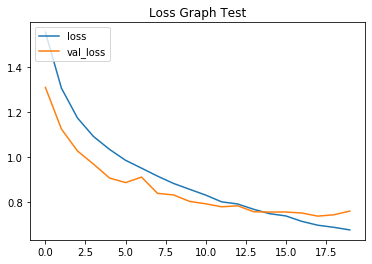

In [11]:
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])
plt.title("Loss Graph Test")
plt.legend(['loss','val_loss'], loc="upper left")

In [12]:
model.evaluate(x_test_shaped, y_test_cat)

10000/10000 [==============================] - 3s 285us/step


[0.8163019453048707, 0.7256]

In [13]:
#存成hdf5類型檔案
model.save("cnn.h5")

In [ ]:
#開始測試

In [14]:
from keras.datasets import cifar10
((x_train,y_train),(x_test,y_test)) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
label = {0:"飛機", 1:"車", 2:"鳥", 3:"貓", 4:"鹿", 5:"狗", 6:"青蛙", 7:"馬", 8:"船", 9:"卡車"}

(50000, 32, 32, 3)
(50000, 1)


In [15]:
from keras.utils import np_utils
x_train_shaped = x_train.astype("float32") / 255
x_test_shaped = x_test.astype("float32") / 255
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [16]:
#測試深度對於CNN模型的影響(參考VGG-16有dropout)
model = Sequential()

#First Convolution and Pooling layer
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32,32,3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

#Second Convolution and Pooling layer
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

#Three Convolution layer and Pooling Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(rate=0.25))


#Fully connection layer
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
__________

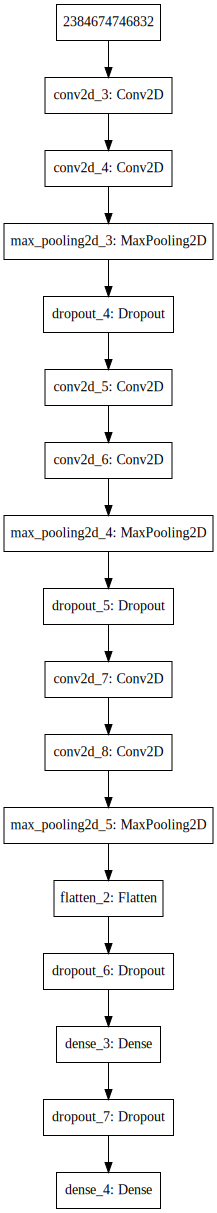

In [17]:
SVG((model_to_dot(model)).create(prog='dot', format = 'svg'))

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history = model.fit(x = x_train_shaped, y = y_train_cat,
                         validation_split = 0.1,
                         epochs = 20,
                         batch_size = 200,
                         verbose = 2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 482s - loss: 1.7484 - acc: 0.3524 - val_loss: 1.3628 - val_acc: 0.4848
Epoch 2/20
 - 436s - loss: 1.2631 - acc: 0.5399 - val_loss: 1.0542 - val_acc: 0.6198
Epoch 3/20
 - 439s - loss: 1.0362 - acc: 0.6307 - val_loss: 0.8799 - val_acc: 0.6936
Epoch 4/20
 - 448s - loss: 0.8872 - acc: 0.6872 - val_loss: 0.7525 - val_acc: 0.7444
Epoch 5/20
 - 472s - loss: 0.7792 - acc: 0.7261 - val_loss: 0.7490 - val_acc: 0.7434
Epoch 6/20
 - 452s - loss: 0.6967 - acc: 0.7556 - val_loss: 0.6395 - val_acc: 0.7718
Epoch 7/20
 - 451s - loss: 0.6308 - acc: 0.7778 - val_loss: 0.6066 - val_acc: 0.7924
Epoch 8/20
 - 439s - loss: 0.5733 - acc: 0.7977 - val_loss: 0.5813 - val_acc: 0.8028
Epoch 9/20
 - 440s - loss: 0.5239 - acc: 0.8151 - val_loss: 0.6197 - val_acc: 0.7888
Epoch 10/20
 - 451s - loss: 0.4884 - acc: 0.8280 - val_loss: 0.5469 - val_acc: 0.8144
Epoch 11/20
 - 450s - loss: 0.4477 - acc: 0.8404 - val_loss: 0.5519 - val_acc: 0.8182
Epoch 12/20
 -

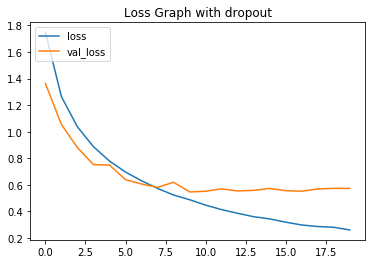

In [19]:
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])
plt.title("Loss Graph with dropout")
plt.legend(['loss','val_loss'], loc="upper left")

In [20]:
model.evaluate(x_test_shaped, y_test_cat)
#val_loss在超過10次後停止下降，可以訓練7-10次就好

10000/10000 [==============================] - 24s 2ms/step


[0.6149757656812668, 0.8234]

In [21]:
#測試深度對於CNN模型的影響(參考VGG-16無dropout)
model = Sequential()

#First Convolution and Pooling layer
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32,32,3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))


#Second Convolution and Pooling layer
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))


#Three Convolution layer and Pooling Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())


#Fully connection layer
model.add(Dense(1024,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 256)         295168    
__________

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history = model.fit(x = x_train_shaped, y = y_train_cat,
                         validation_split = 0.1,
                         epochs = 20,
                         batch_size = 200,
                         verbose = 2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 428s - loss: 1.6838 - acc: 0.3771 - val_loss: 1.3037 - val_acc: 0.5250
Epoch 2/20
 - 446s - loss: 1.1416 - acc: 0.5891 - val_loss: 1.0179 - val_acc: 0.6372
Epoch 3/20
 - 448s - loss: 0.9087 - acc: 0.6766 - val_loss: 0.8209 - val_acc: 0.7146
Epoch 4/20
 - 422s - loss: 0.7448 - acc: 0.7391 - val_loss: 0.7447 - val_acc: 0.7424
Epoch 5/20
 - 421s - loss: 0.6184 - acc: 0.7820 - val_loss: 0.6958 - val_acc: 0.7652
Epoch 6/20
 - 443s - loss: 0.5069 - acc: 0.8205 - val_loss: 0.6693 - val_acc: 0.7818
Epoch 7/20
 - 431s - loss: 0.4051 - acc: 0.8559 - val_loss: 0.6552 - val_acc: 0.7830
Epoch 8/20
 - 430s - loss: 0.3103 - acc: 0.8914 - val_loss: 0.7274 - val_acc: 0.7862
Epoch 9/20
 - 421s - loss: 0.2333 - acc: 0.9182 - val_loss: 0.7830 - val_acc: 0.7866
Epoch 10/20
 - 419s - loss: 0.1773 - acc: 0.9376 - val_loss: 0.8561 - val_acc: 0.7766
Epoch 11/20
 - 418s - loss: 0.1427 - acc: 0.9497 - val_loss: 0.9689 - val_acc: 0.7824
Epoch 12/20
 -

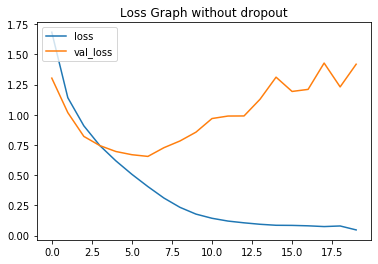

In [23]:
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])
plt.title("Loss Graph without dropout")
plt.legend(['loss','val_loss'], loc="upper left")

In [24]:
model.evaluate(x_test_shaped, y_test_cat)
#雖然loss一值下降，但val_loss在超過5次後開始上升

10000/10000 [==============================] - 24s 2ms/step


[1.5073698106765747, 0.7698]

In [ ]:
#發現透過較多層的運算可以得到較佳的預測結果(0.73>0.82)
#發現如果沒有使用dropout，可能產生過擬合導致準度下降(0.82>0.7698)